In [1]:
import numpy as np
import pandas as pd


# path='/root/work/result/vit_k'
# path='/root/work/result/vit_depth4_k'
path='/root/work/result/ViT/depth4'

# Load the contents of the file
data = np.load(path+'/log.npy')

# Display the contents
print(data.shape)

(5, 2000, 3)


In [2]:
result = []
for i in range(5):
    min_index = np.argmin(data[i][:,2])
    result.append(data[i][min_index])


df_result = pd.DataFrame(result)

print(df_result)
df_result.to_csv(path+'/result.csv', index=False)

        0         1         2
0  1281.0  0.011330  0.016784
1  1993.0  0.004080  0.049129
2  1598.0  0.009108  0.016478
3   984.0  0.017681  0.031925
4   487.0  0.019240  0.030909


In [5]:
np.mean(df_result[2])

0.029044768332448696

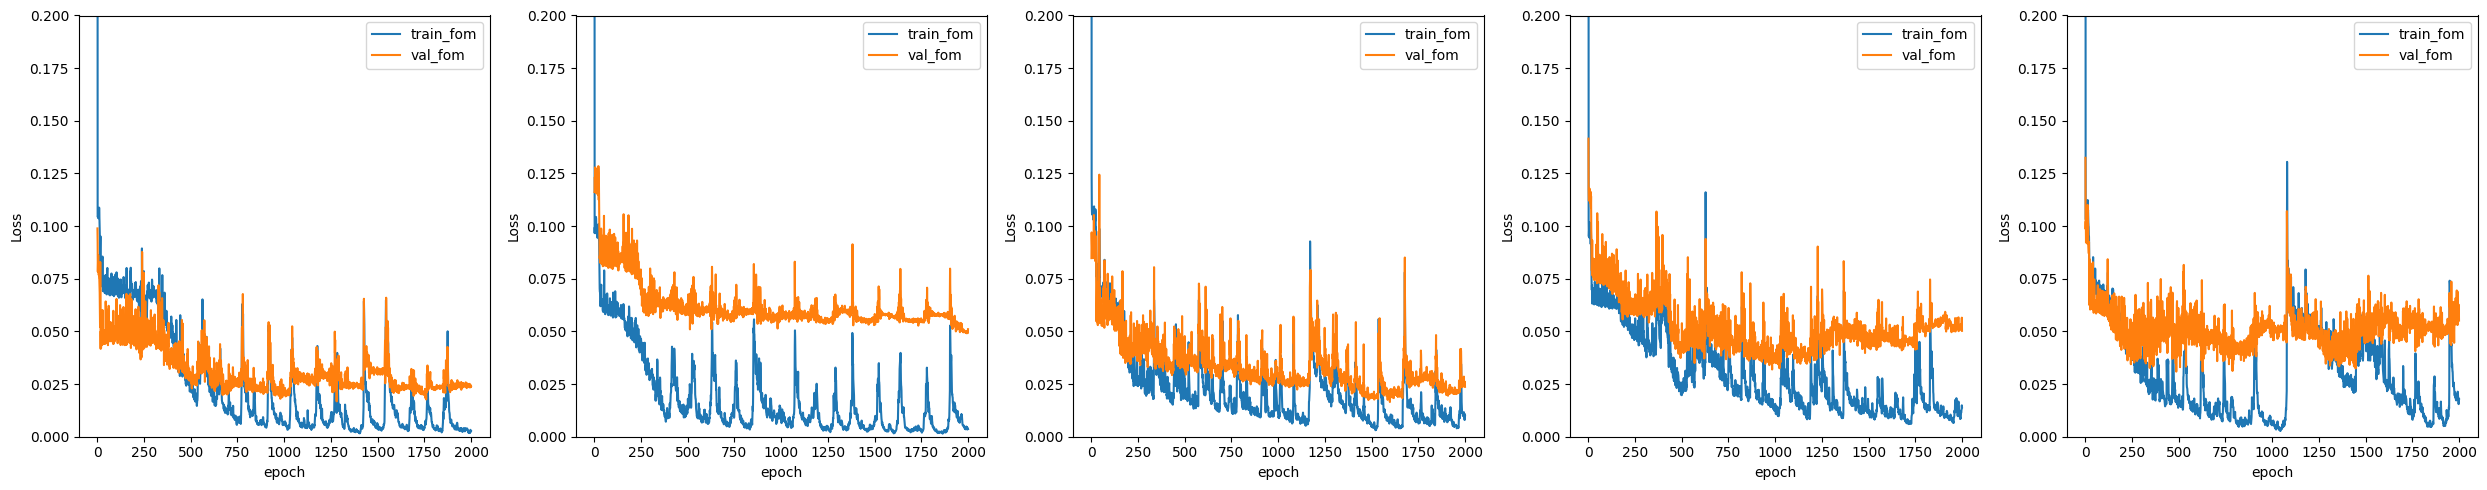

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i in range(5):
    axs[i].plot(data[i][:, 0], data[i][:, 1], label='train_fom')
    axs[i].plot(data[i][:, 0], data[i][:, 2], label='val_fom')
    axs[i].set_xlabel('epoch')
    axs[i].set_ylabel('Loss')
    axs[i].set_ylim(0, 0.2)
    axs[i].legend()

plt.tight_layout()
plt.show()
fig.savefig(path+'/fom_graph.png')